# DSCI 632 Final

Your final is to use the dataset of your choice and the techniques in this class to do the following:

1. Define and describe the dataset (10 points)
1. Clean the data (10 points)
1. Transform the clean data (10 points)
1. Show your analysis of the data (10 points)

---

# Section 1: Define and describe the dataset



The dataset I chose looks at NFL penalties from the 2009-2022 seasons spanning multiple CSV files that detail the  games, penalties, players, and teams' penalty statistics. This dataset provides a complete look at the disciplinary  aspects of NFL games, including which teams,players, positions are most penalized, the nature of these penalties, and how they affect game outcomes. By analyzing this data, I hope to uncover patterns and insights that could uncover light on game dynamics, team discipline, referee strictness, and possibly the impact of penalties on winning probabilities.


Here is a link the the specific dataset I chose: https://www.kaggle.com/datasets/mattop/nfl-penalties-data-2009-2022-season

The NFL penalties dataset is selected for its valuable look into the game's penalties. Penalties can significantly influence game results, team morale, and even a player's career. They reflect not just on the players but the coaching style, team culture, and effectiveness of referees.  Additionally, penalties can shift momentum and change the play-calling and therefore output of the game.

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:

!pip install pyspark

# Import necessary libraries
from pyspark.sql import SparkSession

# Initialize SparkSession
spark = SparkSession.builder.appName("NFL Penalties Analysis").getOrCreate()

# Define file paths for each CSV file
games_csv_path = '/content/drive/MyDrive/DREXEL/Winter24/DSCI632/FINAL PROJECT/DATA/games.csv'
log_csv_path = '/content/drive/MyDrive/DREXEL/Winter24/DSCI632/FINAL PROJECT/DATA/log.csv'
penalties_csv_path = '/content/drive/MyDrive/DREXEL/Winter24/DSCI632/FINAL PROJECT/DATA/penalties.csv'
players_csv_path = '/content/drive/MyDrive/DREXEL/Winter24/DSCI632/FINAL PROJECT/DATA/players.csv'
team_csv_path = '/content/drive/MyDrive/DREXEL/Winter24/DSCI632/FINAL PROJECT/DATA/team.csv'

# Load each CSV file into a PySpark DataFrame
games_df = spark.read.csv(games_csv_path, header=True, inferSchema=True)
log_df = spark.read.csv(log_csv_path, header=True, inferSchema=True)
penalties_df = spark.read.csv(penalties_csv_path, header=True, inferSchema=True)
players_df = spark.read.csv(players_csv_path, header=True, inferSchema=True)
team_df = spark.read.csv(team_csv_path, header=True, inferSchema=True)

# Show the schema of each DataFrame
games_df.printSchema()
log_df.printSchema()
penalties_df.printSchema()
players_df.printSchema()
team_df.printSchema()



root
 |-- Away_Team: string (nullable = true)
 |-- Home_Team: string (nullable = true)
 |-- Date: string (nullable = true)
 |-- Ref_Crew: string (nullable = true)
 |-- Accepted_Count: integer (nullable = true)
 |-- Yards: integer (nullable = true)
 |-- Away_Count: integer (nullable = true)
 |-- Away_Yards: integer (nullable = true)
 |-- Home_Count: integer (nullable = true)
 |-- Home_Yards: integer (nullable = true)
 |-- Total_Flags: integer (nullable = true)
 |-- Week: integer (nullable = true)
 |-- Year: integer (nullable = true)

root
 |-- Penalty: string (nullable = true)
 |-- Date: string (nullable = true)
 |-- Against: string (nullable = true)
 |-- Beneficiary: string (nullable = true)
 |-- Player: string (nullable = true)
 |-- Pos: string (nullable = true)
 |-- Ref_Crew: string (nullable = true)
 |-- Quarter: double (nullable = true)
 |-- Time: timestamp (nullable = true)
 |-- Down: double (nullable = true)
 |-- Distance: double (nullable = true)
 |-- Declined: string (nullable 

<ipython-input-19-e6bfbbc97260>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total_Penalties', y='Pos', data=penalties_by_position_pd, palette='viridis')


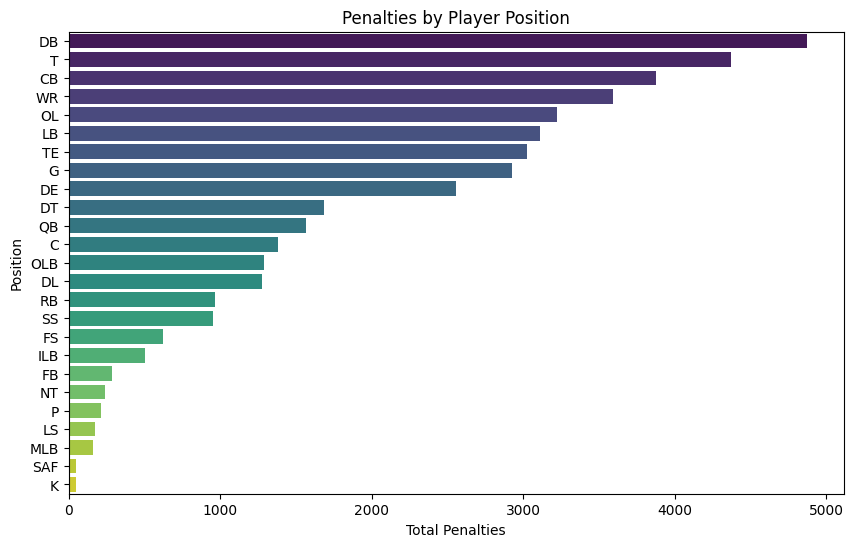

In [19]:
# Import necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate penalties by position
penalties_by_position = players_df.groupBy('Pos').agg(
    {'Count': 'sum'}
).withColumnRenamed('sum(Count)', 'Total_Penalties')

# Convert to Pandas DataFrame for visualization
penalties_by_position_pd = penalties_by_position.toPandas()

# Sort the data for better visualization
penalties_by_position_pd.sort_values('Total_Penalties', ascending=False, inplace=True)

# Create the histogram
plt.figure(figsize=(10, 6))
sns.barplot(x='Total_Penalties', y='Pos', data=penalties_by_position_pd, palette='viridis')
plt.title('Penalties by Player Position')
plt.xlabel('Total Penalties')
plt.ylabel('Position')
plt.show()


From the chart, we can see that defensive backs (DB), tackles (T), cornerbacks (CB), wide receivers (WR), and offensive linemen (OL) are the positions with the most penalties. This aligns with expectations as these positions are heavily involved in play where penalties are common, such as pass interference for DBs and CBs, holding for Ts and OLs, and false starts for WRs.



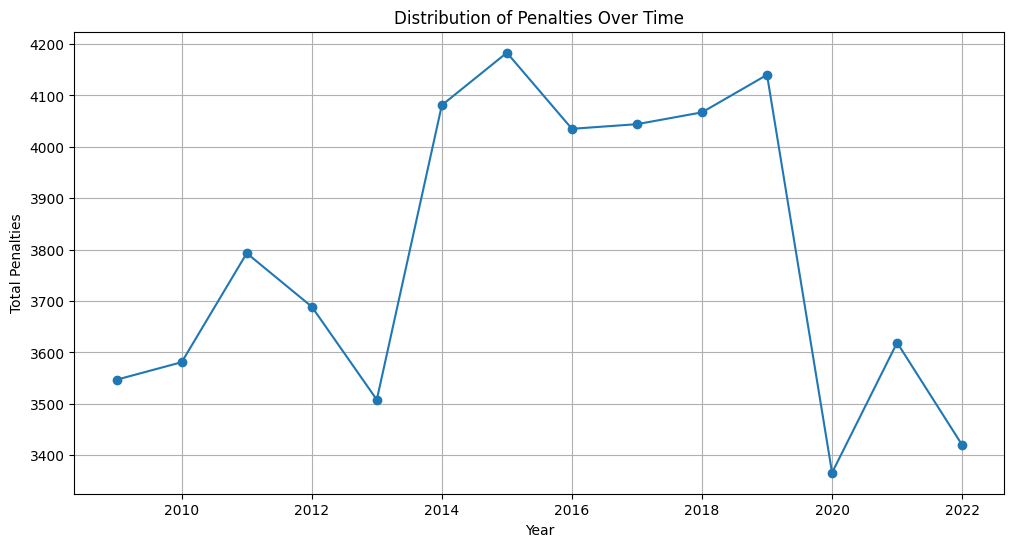

In [20]:
# Aggregate penalties by year
penalties_by_year = log_df.groupBy('Year').agg(
    {'Penalty': 'count'}
).withColumnRenamed('count(Penalty)', 'Total_Penalties')

# Convert to Pandas DataFrame for easier plotting
penalties_by_year_pd = penalties_by_year.toPandas()

# Sort the data by year for chronological plotting
penalties_by_year_pd.sort_values('Year', inplace=True)

# Visualization
plt.figure(figsize=(12, 6))
plt.plot(penalties_by_year_pd['Year'], penalties_by_year_pd['Total_Penalties'], marker='o')
plt.title('Distribution of Penalties Over Time')
plt.xlabel('Year')
plt.ylabel('Total Penalties')
plt.grid(True)
plt.show()


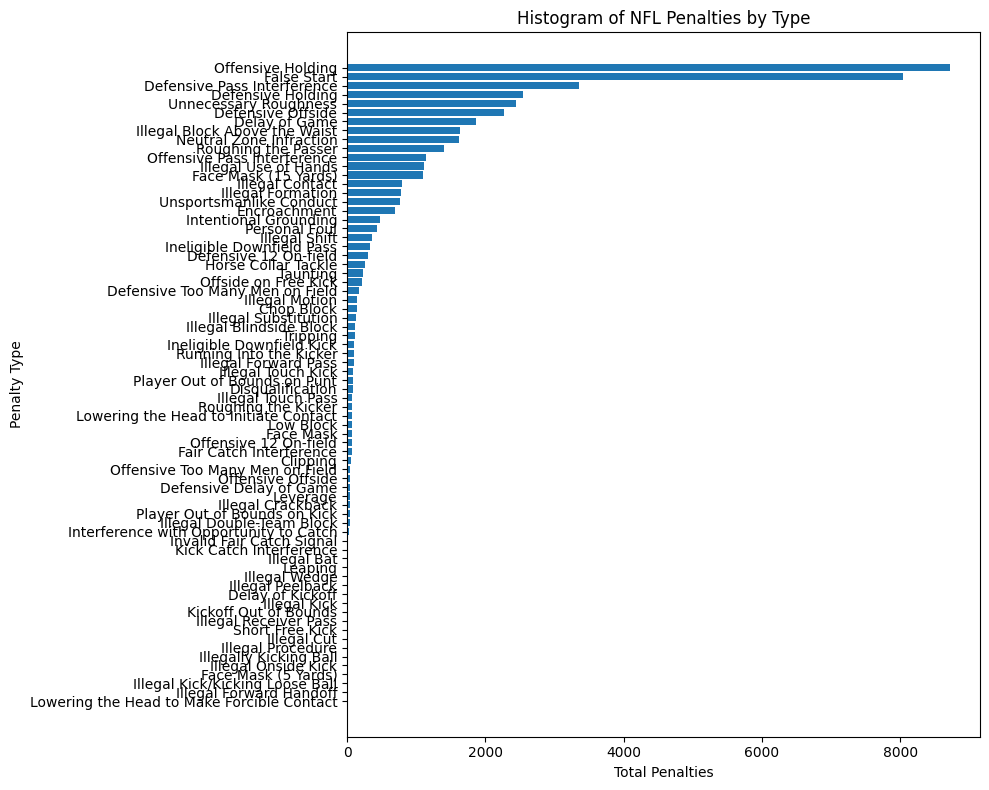

In [21]:
# Aggregate the penalty counts by penalty type using PySpark
penalty_counts_df = penalties_df.groupBy('Name').sum('Count')

penalty_counts_pandas = penalty_counts_df.toPandas()

# Sort the values by Count for better visualization
penalty_counts_pandas = penalty_counts_pandas.sort_values(by='sum(Count)', ascending=True)

# Rename the columns for clarity
penalty_counts_pandas.columns = ['Penalty Type', 'Total Penalties']

# Create the histogram using Matplotlib
plt.figure(figsize=(10, 8))
plt.barh(penalty_counts_pandas['Penalty Type'], penalty_counts_pandas['Total Penalties'])
plt.xlabel('Total Penalties')
plt.ylabel('Penalty Type')
plt.title('Histogram of NFL Penalties by Type')
plt.tight_layout()
plt.show()

From the histogram, it appears that "Offensive Holding" is by far the most common penalty, with its bar significantly longer than the others, indicating it has been called much more frequently than any other penalty type. Other common penalties include "False Start" and "Defensive Pass Interference", as they have the next longest bars.

**Dataset Information:**

1. Variables Used:

The dataset includes information about games, penalties, players, and teams' penalty statistics.
Relevant variables might include:
Game details such as date, teams involved, referee crew, and week of the season.
Penalty details such as type of penalty, yards penalized, team penalized, and player involved.
Player details such as player name, position, and team affiliation.
Team penalty statistics such as total flags, yards penalized, and accepted penalties.

2. Analysis Plan:

Analyze the frequency and distribution of penalties across different teams, players, and positions.
Investigate the types of penalties that occur most frequently.
Explore any correlations between penalties and team performance, player performance, or specific game situations.

3. Hypotheses:
The hypothesis is that certain factors (e.g., player positions) are strong predictors of penalty likelihood.


# Section 2: Clean the data



In [22]:
from pyspark.sql.functions import col,count, when

# Count rows before dropping nulls
initial_counts = {
    'games': games_df.count(),
    'log': log_df.count(),
    'penalties': penalties_df.count(),
    'players': players_df.count(),
    'team': team_df.count()
}

# Counting nulls in one of the DataFrames
games_null_counts = games_df.select([count(when(col(c).isNull(), c)).alias(c) for c in games_df.columns])

games_null_counts.show()


+---------+---------+----+--------+--------------+-----+----------+----------+----------+----------+-----------+----+----+
|Away_Team|Home_Team|Date|Ref_Crew|Accepted_Count|Yards|Away_Count|Away_Yards|Home_Count|Home_Yards|Total_Flags|Week|Year|
+---------+---------+----+--------+--------------+-----+----------+----------+----------+----------+-----------+----+----+
|        0|        0|   0|       0|             0|    0|         0|         0|         0|         0|          0|   0|   0|
+---------+---------+----+--------+--------------+-----+----------+----------+----------+----------+-----------+----+----+



In [23]:
# Removing rows with any null values
games_df_clean = games_df.na.drop()
log_df_clean = log_df.na.drop()
penalties_df_clean = penalties_df.na.drop()
players_df_clean = players_df.na.drop()
team_df_clean = team_df.na.drop()

# Final counts after dropping nulls
final_counts = {
    'games': games_df_clean.count(),
    'log': log_df_clean.count(),
    'penalties': penalties_df_clean.count(),
    'players': players_df_clean.count(),
    'team': team_df_clean.count()
}

# Calculating the number of rows dropped
rows_dropped = {key: initial_counts[key] - final_counts[key] for key in initial_counts}

# Output the results
print("Rows Dropped:", rows_dropped)
print("Initial Counts:", initial_counts)
print("Final Counts:", final_counts)

Rows Dropped: {'games': 0, 'log': 2994, 'penalties': 0, 'players': 0, 'team': 0}
Initial Counts: {'games': 3582, 'log': 53073, 'penalties': 17136, 'players': 43407, 'team': 7473}
Final Counts: {'games': 3582, 'log': 50079, 'penalties': 17136, 'players': 43407, 'team': 7473}


In [24]:
from pyspark.sql.functions import lower, regexp_replace

# Convert all text to lower-case and remove punctuation for a specific DataFrame
log_df_clean = log_df_clean.withColumn("Penalty", lower(col("Penalty")))
log_df_clean = log_df_clean.withColumn("Penalty", regexp_replace(col("Penalty"), "[^a-zA-Z0-9\\s]", ""))


Getting rid of all the null values means that any incomplete data isn't skewing the results.

# Section 3: Transform the clean data



In [25]:
from pyspark.sql.functions import col, udf
from pyspark.sql.types import StringType

# Updated mapping with more specific position groups
updated_position_groups = {
    # Offensive Skill Positions
    'QB': 'Offensive Skill', 'RB': 'Offensive Skill', 'WR': 'Offensive Skill', 'TE': 'Offensive Skill',

    # Defensive Skill Positions
    'CB': 'Defensive Skill', 'SS': 'Defensive Skill', 'FS': 'Defensive Skill',

    # Offensive Line
    'OL': 'Offensive Line', 'T': 'Offensive Line', 'G': 'Offensive Line', 'C': 'Offensive Line',

    # Defensive Line and Linebackers
    'DE': 'Defensive Line', 'DT': 'Defensive Line', 'LB': 'Linebacker', 'ILB': 'Linebacker', 'OLB': 'Linebacker', 'NT': 'Defensive Line',

    # Special Teams Players
    'K': 'Special Teams', 'P': 'Special Teams', 'LS': 'Special Teams'
}

# Define the UDF with the updated position groups
def map_position_to_group(position):
    return updated_position_groups.get(position, 'Other')

# Register the UDF in PySpark
spark_udf = udf(map_position_to_group, StringType())

# Apply the UDF to the DataFrame to create the new column
players_df_clean = players_df_clean.withColumn("Position_Group", spark_udf(col("Pos")))

# Display the updated DataFrame to verify the transformation
players_df_clean.select("Name", "Team", "Pos", "Position_Group").show()


+-----------+------------+---+---------------+
|       Name|        Team|Pos| Position_Group|
+-----------+------------+---+---------------+
|     D.Bell|     Buffalo|  T| Offensive Line|
|  D.Stewart|   Tennessee|  T| Offensive Line|
| T.Polamalu|  Pittsburgh| SS|Defensive Skill|
|R.Incognito|   St. Louis|  C| Offensive Line|
|    C.Green|     Oakland|  T| Offensive Line|
|   J.Flacco|   Baltimore| QB|Offensive Skill|
|  C.Johnson|  Cincinnati| WR|Offensive Skill|
|  B.Edwards|   Cleveland| WR|Offensive Skill|
|   A.Wilson|     Arizona| SS|Defensive Skill|
|  J.Abraham|     Atlanta|OLB|     Linebacker|
|  V.Wilfork| New England| NT| Defensive Line|
| D.Ferguson|   N.Y. Jets|  T| Offensive Line|
|  M.Sanchez|   N.Y. Jets| QB|Offensive Skill|
|   P.Rivers|   San Diego| QB|Offensive Skill|
|  D.Dockett|     Arizona| DT| Defensive Line|
|   D.Koppen| New England|  C| Offensive Line|
|  D.Sharper| New Orleans| FS|Defensive Skill|
|  S.Andrews|Philadelphia|  G| Offensive Line|
| B.Hamilton|

In [26]:
from pyspark.ml.feature import StringIndexer

# Initialize StringIndexer for 'Team' column
team_indexer = StringIndexer(inputCol="Team", outputCol="Team_Index")

# Fit and Transform the DataFrame to include the 'Team_Index' column
players_df_clean = team_indexer.fit(players_df_clean).transform(players_df_clean)

# Initialize StringIndexer for 'Position_Group' column
position_group_indexer = StringIndexer(inputCol="Position_Group", outputCol="Position_Group_Index")

# Fit and Transform the DataFrame to include the 'Position_Group_Index' column
players_df_clean = position_group_indexer.fit(players_df_clean).transform(players_df_clean)

# Show the updated DataFrame to verify the new columns
players_df_clean.select("Name", "Team", "Team_Index", "Pos", "Position_Group", "Position_Group_Index").show()


+-----------+------------+----------+---+---------------+--------------------+
|       Name|        Team|Team_Index|Pos| Position_Group|Position_Group_Index|
+-----------+------------+----------+---+---------------+--------------------+
|     D.Bell|     Buffalo|       2.0|  T| Offensive Line|                 0.0|
|  D.Stewart|   Tennessee|      12.0|  T| Offensive Line|                 0.0|
| T.Polamalu|  Pittsburgh|      19.0| SS|Defensive Skill|                 3.0|
|R.Incognito|   St. Louis|      31.0|  C| Offensive Line|                 0.0|
|    C.Green|     Oakland|      22.0|  T| Offensive Line|                 0.0|
|   J.Flacco|   Baltimore|      10.0| QB|Offensive Skill|                 1.0|
|  C.Johnson|  Cincinnati|      23.0| WR|Offensive Skill|                 1.0|
|  B.Edwards|   Cleveland|      11.0| WR|Offensive Skill|                 1.0|
|   A.Wilson|     Arizona|       6.0| SS|Defensive Skill|                 3.0|
|  J.Abraham|     Atlanta|      27.0|OLB|     Lineba

In [28]:
from pyspark.ml.feature import VectorAssembler

# Define the input columns for the VectorAssembler
inputCols = ["Team_Index", "Position_Group_Index", "Year"]

# Initialize the VectorAssembler
assembler = VectorAssembler(inputCols=inputCols, outputCol="features")

# Transform the DataFrame to include the 'features' column
players_df_ready = assembler.transform(players_df_clean)

# Show the DataFrame to verify the 'features' vector column has been added
players_df_ready.select("Name", "Team", "Pos", "Position_Group", "Year", "features").show()


+-----------+------------+---+---------------+----+-----------------+
|       Name|        Team|Pos| Position_Group|Year|         features|
+-----------+------------+---+---------------+----+-----------------+
|     D.Bell|     Buffalo|  T| Offensive Line|2009| [2.0,0.0,2009.0]|
|  D.Stewart|   Tennessee|  T| Offensive Line|2009|[12.0,0.0,2009.0]|
| T.Polamalu|  Pittsburgh| SS|Defensive Skill|2009|[19.0,3.0,2009.0]|
|R.Incognito|   St. Louis|  C| Offensive Line|2009|[31.0,0.0,2009.0]|
|    C.Green|     Oakland|  T| Offensive Line|2009|[22.0,0.0,2009.0]|
|   J.Flacco|   Baltimore| QB|Offensive Skill|2009|[10.0,1.0,2009.0]|
|  C.Johnson|  Cincinnati| WR|Offensive Skill|2009|[23.0,1.0,2009.0]|
|  B.Edwards|   Cleveland| WR|Offensive Skill|2009|[11.0,1.0,2009.0]|
|   A.Wilson|     Arizona| SS|Defensive Skill|2009| [6.0,3.0,2009.0]|
|  J.Abraham|     Atlanta|OLB|     Linebacker|2009|[27.0,4.0,2009.0]|
|  V.Wilfork| New England| NT| Defensive Line|2009|[29.0,5.0,2009.0]|
| D.Ferguson|   N.Y.

In [29]:
from pyspark.sql.functions import when


penalty_threshold = 2

# Create the label column based on whether the player's penalty count exceeds the threshold
players_df_ready = players_df_ready.withColumn(
    "label",
    when(players_df_ready["Count"] > penalty_threshold, 1).otherwise(0)
)

# Show the DataFrame with the new label column
players_df_ready.select("Name", "Team", "Pos", "Count", "label").show()


+-----------+------------+---+-----+-----+
|       Name|        Team|Pos|Count|label|
+-----------+------------+---+-----+-----+
|     D.Bell|     Buffalo|  T|    3|    1|
|  D.Stewart|   Tennessee|  T|    3|    1|
| T.Polamalu|  Pittsburgh| SS|    2|    0|
|R.Incognito|   St. Louis|  C|    3|    1|
|    C.Green|     Oakland|  T|    3|    1|
|   J.Flacco|   Baltimore| QB|    1|    0|
|  C.Johnson|  Cincinnati| WR|    2|    0|
|  B.Edwards|   Cleveland| WR|    2|    0|
|   A.Wilson|     Arizona| SS|    2|    0|
|  J.Abraham|     Atlanta|OLB|    2|    0|
|  V.Wilfork| New England| NT|    2|    0|
| D.Ferguson|   N.Y. Jets|  T|    2|    0|
|  M.Sanchez|   N.Y. Jets| QB|    2|    0|
|   P.Rivers|   San Diego| QB|    2|    0|
|  D.Dockett|     Arizona| DT|    2|    0|
|   D.Koppen| New England|  C|    2|    0|
|  D.Sharper| New Orleans| FS|    1|    0|
|  S.Andrews|Philadelphia|  G|    2|    0|
| B.Hamilton|      Denver|  G|    2|    0|
| C.Thompson|     Houston| LB|    2|    0|
+----------

In [31]:
# Split the data into train and test sets
train_data, test_data = players_df_ready.randomSplit([0.8, 0.2], seed=42)


In this section I created a user-defined function to catergorize player positions into groups of Skill, Line, or Special Teams. I then used VectorAssembler to create a features column to be used in Spark.I then created a threshold of 2. Lastly, split my data for training.

# Section 4: Show your analysis of the data



To test our hypothesis that certain positions and teams are more likely to incur penalties, we will fit a logistic regression model. A logistic regression was chosen due to its usefulness in binary classification. Our goal was to be able to predict whether a player os likely to commit a penalty past my threshold set above.


In [32]:
from pyspark.ml.classification import LogisticRegression

# Initialize the classifier
lr = LogisticRegression(featuresCol='features', labelCol='label')

# Train the model
lr_model = lr.fit(train_data)

# Make predictions on the test data
predictions = lr_model.transform(test_data)


We will evaluate our model's performance using several metrics: accuracy, precision, recall, and F1 score. These metrics give us a comprehensive understanding of how well our model is identifying players with a high tendency for penalties.


In [33]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator

# Evaluate the model using the Binary Classification Evaluator and the area under ROC
binary_evaluator = BinaryClassificationEvaluator()
roc_auc = binary_evaluator.evaluate(predictions, {binary_evaluator.metricName: "areaUnderROC"})

# Use the Multiclass Classification Evaluator for accuracy, weighted precision, and recall
multi_evaluator = MulticlassClassificationEvaluator()
accuracy = multi_evaluator.evaluate(predictions, {multi_evaluator.metricName: "accuracy"})
precision = multi_evaluator.evaluate(predictions, {multi_evaluator.metricName: "weightedPrecision"})
recall = multi_evaluator.evaluate(predictions, {multi_evaluator.metricName: "weightedRecall"})
f1 = multi_evaluator.evaluate(predictions, {multi_evaluator.metricName: "f1"})

# Display the results
print(f"ROC AUC: {roc_auc}")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


ROC AUC: 0.6260595629342571
Accuracy: 0.9883613735883844
Precision: 0.976858204801518
Recall: 0.9883613735883844
F1 Score: 0.9825761230098606


The ROC AUC score gives us an idea of the model's ability to distinguish between the two classes, where a score of 1 would be perfect. Accuracy tells us the proportion of total predictions that were correct, while precision and recall give us measures of quality and completeness of the positive predictions, respectively. The F1 score combines precision and recall into a single metric, which is particularly useful when the class distribution is imbalanced.



This model helps us understand and predict which players or teams are more likely to commit penalties in football games. It looks at past data—like player positions, team statistics, and penalty types—to identify patterns. Then, it uses these patterns to make educated guesses on future games. So, if we input data about a player or a team into the model, it can tell us if they're at a higher risk of committing a penalty. This is really useful for coaches and players to identify areas where they might need to be more careful or work on discipline to avoid penalties that could hurt their chances of winning a game.


Our study can be replicated by following the outlined steps of data cleaning, preparation, and modeling. Variations in the results might occur with different threshold choices for the 'label' column, the addition of more features, or the use of different machine learning algorithms. Future studies might incorporate more granular data, such as specific game situations or player behavior patterns, to refine the predictions further.
